In [1]:
# Getting started

# A simple notebooks for testing some analyses on the first version of the questionnaire.
# Data are not pushed to github due to privacy reasons. 
# The treated_data.csv should be copied to the data/ folder. 

# Let's first load the data to understand its structure and then compute general statistical information.
import pandas as pd

# Load the data
file_path = '../data/Treated data.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
dataset.head()


,INFOS GENERALES,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,CONTEXTE DU RÉCIT,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103
0,TITRE,ANNEE,PAYS,CANAL,TYPE,SAISON,LIEU(X) DE L'ACTION,EPOQUE DU RECIT,TRAITEMENT DU RECIT,TYPE DE MONDE,...,Epoque,Traitement,Monde,Genre,Conso,Vie,Vivant,Climat,Recul,Nécessité
1,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."


---

In [2]:
main_categories: list[str] = dataset.columns.to_list()
columns: list[str] = dataset.iloc[0].values.tolist()

In [3]:
main_categories_as_dict = {}
questions_to_categories = []
valid_category = None
for category, field in zip(main_categories, columns):
    if not category.startswith('Unnamed: '):
        valid_category = category
    if valid_category:
        if valid_category not in main_categories_as_dict:
            main_categories_as_dict[valid_category] = []
        main_categories_as_dict[valid_category] = [*main_categories_as_dict[valid_category], field]
        questions_to_categories.append((field, valid_category))

#questions_to_categories
{ k: len(v) for k, v in main_categories_as_dict.items() }

{'INFOS GENERALES': 6,
 'CONTEXTE DU RÉCIT': 5,
 ' ': 62,
 'EMPREINTE CARBONE': 1,
 'SCORES': 15,
 'Copie paramètres globaux': 15}

In [4]:
#delete first raw
data = dataset[1:]
data.columns = columns

In [5]:
data.head()


,TITRE,ANNEE,PAYS,CANAL,TYPE,SAISON,LIEU(X) DE L'ACTION,EPOQUE DU RECIT,TRAITEMENT DU RECIT,TYPE DE MONDE,...,Epoque,Traitement,Monde,Genre,Conso,Vie,Vivant,Climat,Recul,Nécessité
1,Une nuit,2023,France,SALLE DE CINÉMA,FILM,NaN,"France, Paris",2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-2030,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie-romantique,-1,0,0,0,"Non applicable, les scores obtenus sont neutre...","Non applicable, les scores obtenus sont neutre..."
5,"David Brent, Life on the road",2016,UK,NETFLIX,FILM,NaN,UK,2010-2020,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,...,2010-2020,Ni dystopique ni utopique,Réaliste (monde proche du nôtre dans son fonct...,Comédie,-1,1,0,0,"Peut-être un peu, en filigrane, par petites to...",Tout n'était pas indispensable


In [6]:
# TODO: only nan why? => certains noms de champs vides
# Compute general statistical information for the numerical columns in the data
statistical_info = data.describe()

# Display the statistical information
statistical_info


,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# colonnes
columns

['TITRE',
 'ANNEE',
 'PAYS',
 'CANAL',
 'TYPE',
 'SAISON',
 "LIEU(X) DE L'ACTION",
 'EPOQUE DU RECIT',
 'TRAITEMENT DU RECIT',
 'TYPE DE MONDE',
 'GENRE',
 'POSITION DANS LE RECIT',
 'GENRE',
 'AGE',
 'ETHNICITÉ',
 'BEAUTE',
 'POIDS',
 'PAYS DE RESIDENCE',
 "TYPE D'HABITAT",
 "LIEU D'HABITAT",
 'Appartement',
 'Colocation',
 'Maison',
 'Studio',
 'Hôtel',
 'Ferme',
 'Alternatif / Communautaire',
 'Ne sait pas / Autre',
 'ACTIVITE',
 "SECTEUR D'ACTIVITE",
 'CATEGORIE SOCIALE',
 'ASPIRATIONS',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'VALEURS / TRAITS DE CARACTÈRE',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 'EMPREINTE PERSO',
 'CONSOMMATION & MATERIALISME',
 'CONSOMMATION & MATERIALISME',
 'MODES DE VIE',
 'MODES DE VIE',
 'RAPPORT AU VIVANT',
 'RAPPORT AU VIVANT',
 'CRISE ENVIRONNEMENTALE',
 'CRISE ENVIRONNEMENTALE',
 'Y A-T-IL UN

In [8]:
titre = "TITRE"
c = data[titre].count()
print('Le nombre de réponses est de', c) 

Le nombre de réponses est de 998


In [9]:

# Analyzing the "QUELQUE CHOSE A AJOUTER ?" column to understand its content
field = "QUELQUE CHOSE A AJOUTER ?"
# Check if the column exists
if field in data.columns:
    # Basic analysis of the column
    column = data["QUELQUE CHOSE A AJOUTER ?"]
    # Count of non-empty entries
    non_empty_count = column.notna().sum()
    # Unique non-empty entries
    unique_non_empty_entries = column.nunique()
    # Sample of non-empty entries
    sample_entries = column.dropna().sample(min(5, non_empty_count)).tolist()
    analysis_results = {
        "Non-empty count": non_empty_count,
        "Unique non-empty entries": unique_non_empty_entries,
        "Sample entries": sample_entries
    }
else:
    analysis_results = f"Column {field} does not exist in the dataset."

analysis_results

{'Non-empty count': 54,
 'Unique non-empty entries': 54,
 'Sample entries': ["Bien que le personnage principal voyage en van (donc émissions de carbone !), son mode de vie sobre et décalé, proche de la nature, en fait il me semble un héros positif au regard d'un nécessaire changement de paradigme.",
  'Seule la fin montre le personnage principal revenir à ses valeurs',
  'Bonne représentation des personnages féminins (notamment dans les postes à responsabilité)',
  "Ce genre de série ne s'intéresse pas au mode de vie des protagonistes principaux, on est concentré sur leur boulot et leur problèmes sentimentaux. Néanmoins dans le boulot utilisation de gros SUV ou 4x4 non indispensables",
  "Film décevant avec peu d'intérêt, sujet de l'Apocalypse écologique non traité."]}

In [10]:
# Trouver les titres qui apparaissent plus de 4 fois dans la colonne "TITRE" (car chaque titre a 4 lignes, une pour chaque personnage)
titles_more_than_once = data[titre].value_counts()
titles_more_than_once = titles_more_than_once[titles_more_than_once > 1]

titles_more_than_once


TITRE
Sambre                    3
Le règne animal           3
Polar park                3
Une année difficile       3
Voleuses                  2
Le livre des solutions    2
Sense8                    2
Anatomie d'une chute      2
The Crown                 2
Bodies                    2
Polar Park                2
À plein temps             2
Revoir Paris              2
Second Tour               2
D'argent et de sang       2
Yannick                   2
Name: count, dtype: int64

In [11]:
annee = "ANNEE"

# Extract unique values from the "ANNEE" column to understand its format
unique_years = data[annee].unique()

# Display a few unique values for inspection
unique_years[:100]

array(['2023', nan, '2016', '2022', '1997', '2015', '2006', '2018',
       '2021', '1984', '1968', '2020', '2019', '1971', '2017', '2001',
       '2012', '1987', '2005', '1975', '1982', '2013', '2014', '2010',
       '1994', '2009', '1988', '2000', '2011', '1999', '1957', '2002'],
      dtype=object)

In [12]:
def visualize_year_distribution(years_data: pd.Series, chart_title):
    """
    Visualise la distribution des années, y compris les intervalles, dans un ensemble de données d'années.
    
    Parameters:
    - years_data (list or pd.Series): Un tableau ou une série Pandas contenant des années ou des intervalles d'années.
    
    Returns:
    - Affiche un histogramme de la distribution des années.
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import re  # For regular expression operations
    
    
    # Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
    years_data = years_data.astype(str, errors='ignore')
    
    # Séparer les intervalles en années individuelles et compter la fréquence de chaque année
    all_years = []
    # Utilise un set pour les valeurs non numériques
    non_numeric_entries = set()
    
    for year in years_data:
        if pd.isnull(year):
            non_numeric_entries.add(year)
        if re.search(r'[a-z]', year):  # If there are no digits in the string
            non_numeric_entries.add(year)
        elif "," in year:
            years_list = year.split(",")
            for y in years_list:
                all_years.append(int(y.strip()))  # Ajouter chaque année en la convertissant en entier
        elif "+/-" in year:  # Vérifier si c'est un intervalle
            start_year, uncertainty = year.split("+/-")
            if (start_year != ''):
                all_years.extend(range(int(start_year), int(start_year) + uncertainty + 1))
                print(year)
            else:
                non_numeric_entries.add(year)
        elif "-" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("-")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        elif  "/" in year:  # Vérifier si c'est un intervalle
            start_year, end_year = year.split("/")
            all_years.extend(range(int(start_year), int(end_year) + 1))
        else:
            all_years.append(int(year))
    
    # Print non-numeric entries if any
    if non_numeric_entries:
        print("Non-numeric entries found:", non_numeric_entries)
    
    # Proceed with visualization only if there are numeric years
    if all_years:
        # Créer un DataFrame à partir de la liste des années pour faciliter la visualisation
        df_years = pd.DataFrame(all_years, columns=["Year"])
        
        # Visualiser la distribution des années avec un histogramme
        plt.figure(figsize=(10, 6))
        df_years["Year"].hist(bins=len(df_years["Year"].unique()), color="skyblue", edgecolor="black")
        plt.title(chart_title)
        plt.xlabel("Année")
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    else:
        print("No numeric years found for visualization.")
    return all_years

Non-numeric entries found: {'nan'}


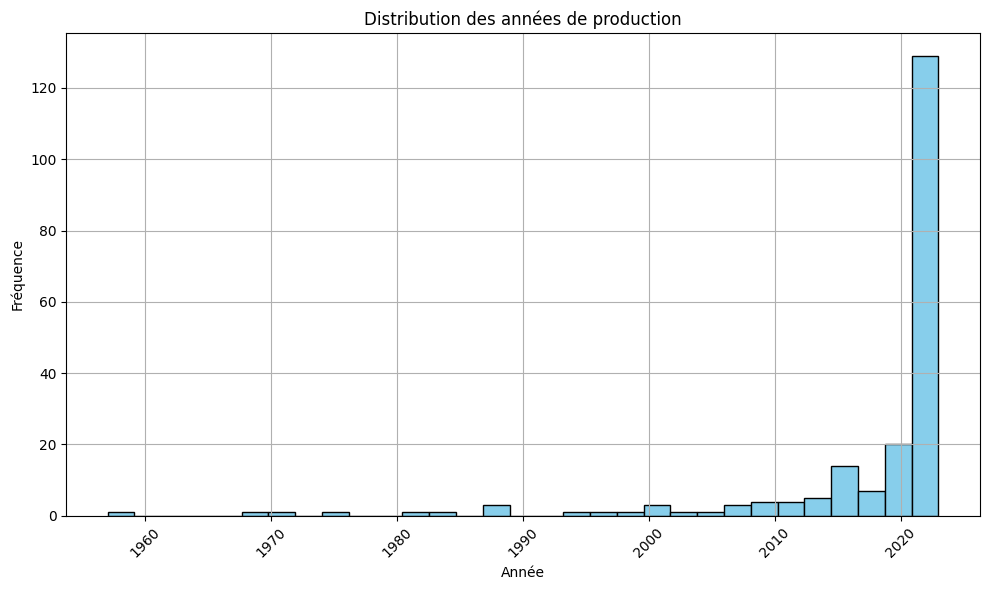

In [13]:
#import matplotlib.pyplot as plt

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
#data[annee] = data[annee].astype(str)
all_prod_years = visualize_year_distribution(data[annee], 'Distribution des années de production')


Non-numeric entries found: {'Tous les 33 ans ', "Aujourd'hui ", 'Milieu du XXI siècle', 'Futur', 'notre époque', 'Actuel ', '1969-1995 (mais uchronie...)', 'Futur très proche', 'Sur plusieurs siecles', '+/- 1930', 'Actuelle', 'nan', 'Futur proche', 'années 2000', 'Contemporain ', 'Années 50', 'Contemporain', 'Années 2010/2020'}


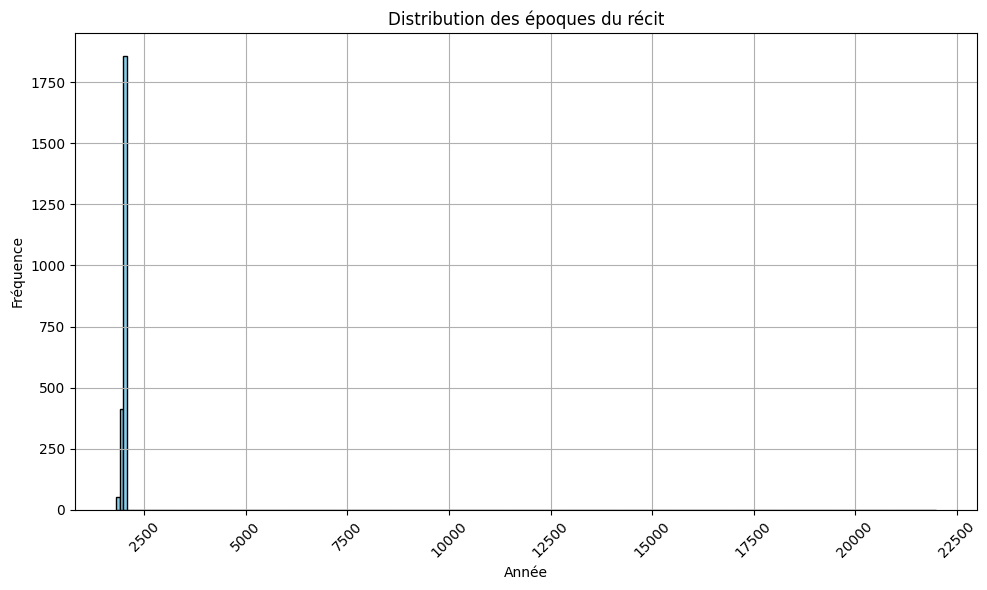

In [14]:
epoque = "EPOQUE DU RECIT"

# Convertir toutes les valeurs en chaînes pour gérer les intervalles potentiels comme des entrées uniques
#data[epoque] = data[epoque].astype(str)
all_years = visualize_year_distribution(data[epoque], 'Distribution des époques du récit')

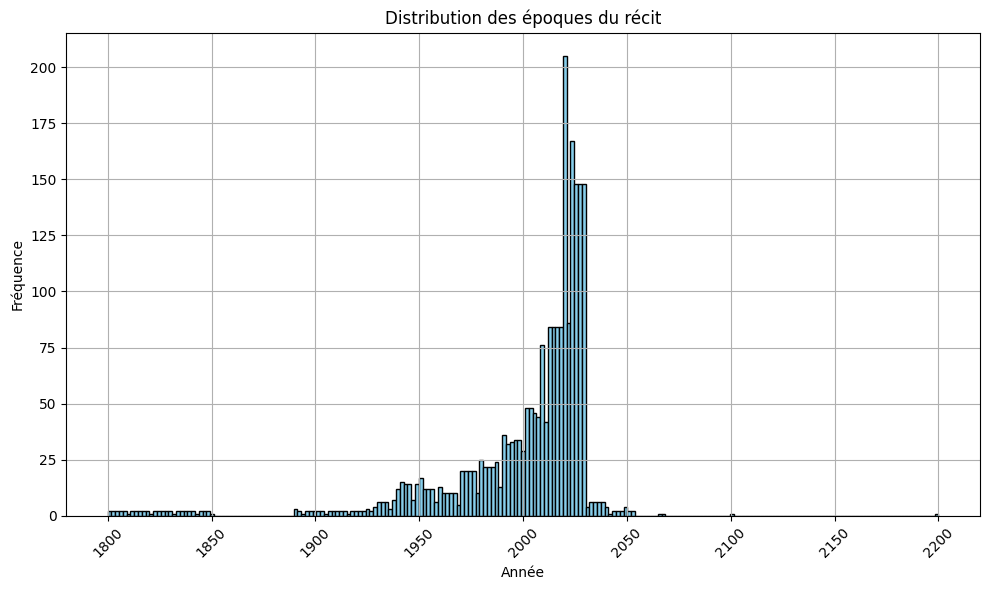

In [15]:
# keep years under 2500
before2500 = [x for x in all_years if x < 2500]
df = pd.DataFrame(before2500, columns=['Année']) 
all_years_before_2500 = visualize_year_distribution(df['Année'], 'Distribution des époques du récit')

In [16]:
# Future dates
# keep years after 2500
[x for x in all_years if x >= 2500]

[22000]

In [17]:
import matplotlib.pyplot as plt

co2 = data["EMPREINTE PERSO"]
c = co2.value_counts()
c.index


Index(['Entre 2 et 10 tonnes', 'Entre 10 et 30 tonnes', 'Entre 0 et 2 tonnes',
       'Entre 30 et 80 tonnes', 'Au-delà de 80 tonnes'],
      dtype='object', name='EMPREINTE PERSO')

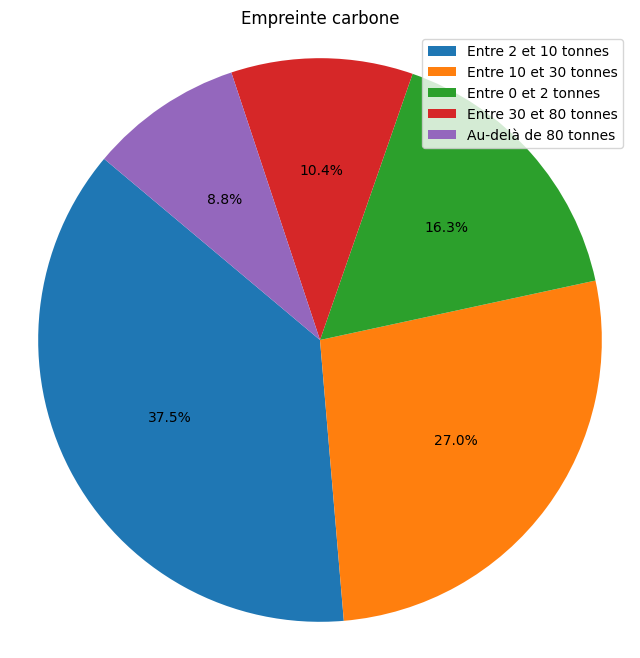

In [18]:
# Construction du camembert
plt.figure(figsize=(8, 8))
plt.pie(c, autopct='%1.1f%%', startangle=140)
plt.title("Empreinte Personnelle")

plt.axis('equal')  # S'assure que le camembert est dessiné comme un cercle.
plt.title('Empreinte carbone')
plt.legend(c.index)
plt.show()


---

In [19]:
# TODO: deduplicate why ?
#duplicate_columns = data.columns[data.columns.duplicated()]
#print("Duplicate Columns:", duplicate_columns)

In [20]:
# Remove duplicate columns
#data = data.drop(columns=duplicate_columns)

# Display the cleaned DataFrame
#print(data)

---

In [21]:
data["Genre_as_list"] = (
    data['Genre']
    .apply(lambda s: s if isinstance(s,str) and s not in ("",", ") else "genre manquant")
    .apply(str.lower)
    .apply(lambda s: [e for e in s.split(", ") if e != ""])
)

/var/folders/cw/pk20bql55690x9wk3ngfpvgm0000gn/T/ipykernel_2272/282844353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Genre_as_list"] = (


In [22]:
import matplotlib.pyplot as plt

genres = data["Genre_as_list"].explode()
c = genres.value_counts()
c.index


Index(['genre manquant', 'drame', 'comédie', 'thriller / policier',
       'science-fiction', 'action', 'comédie-romantique', 'fantastique',
       'historique', 'documentaire', 'biopic', 'anticipation', 'pénal',
       'dessin animé ', 'télé-réalité ', 'militant', 'aventure',
       'fiction réaliste ', 'feel good', 'documentaire romancé', 'horreur'],
      dtype='object', name='Genre_as_list')

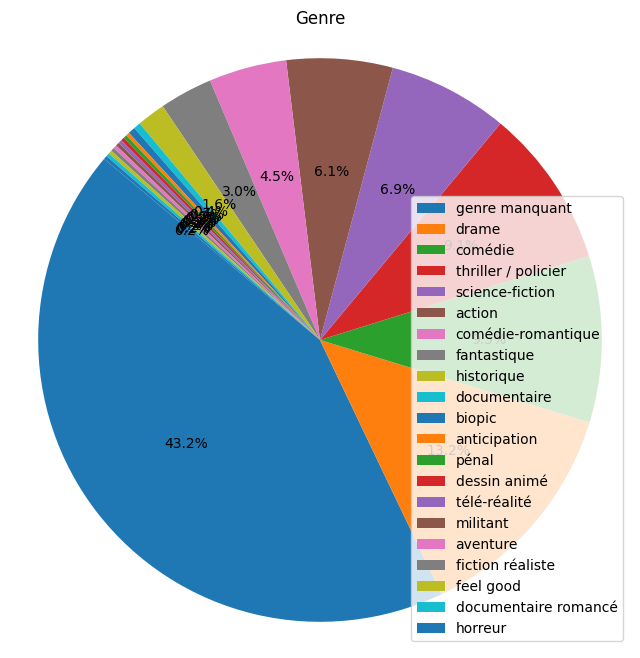

In [23]:
# Construction du camembert genre
plt.figure(figsize=(8, 8))
plt.pie(c, autopct='%1.1f%%', startangle=140)
plt.title('Genre')

plt.axis('equal')  # S'assure que le camembert est dessiné comme un cercle.
plt.title('Genre')
plt.legend(c.index)
plt.show()